# Signal Discontinuity
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [signal_discontinuity_naive.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Digital-Signal-Processing/signal_discontinuity_naive.ipynb)
---
Naive solution for signal discontinuity.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

from _utils import *

audio mono


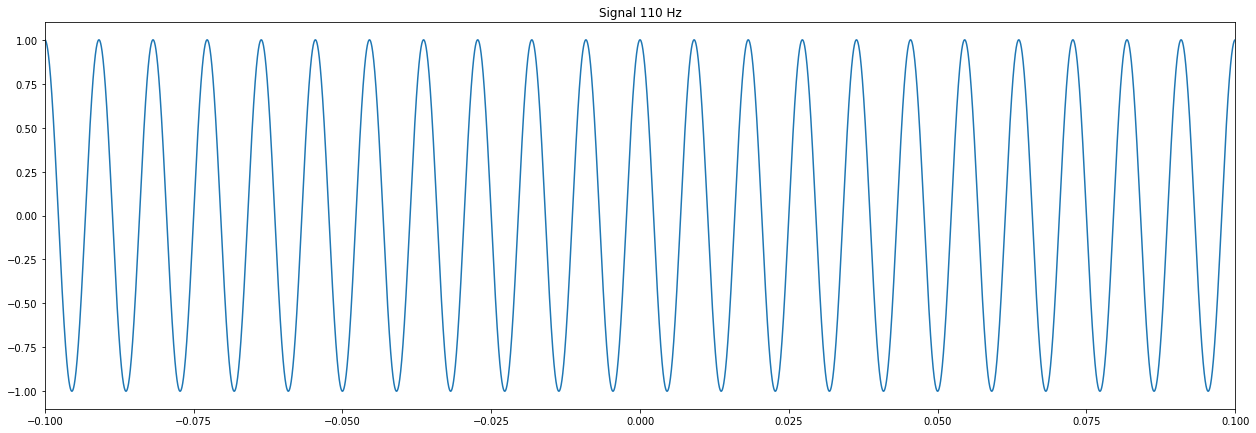

audio mono


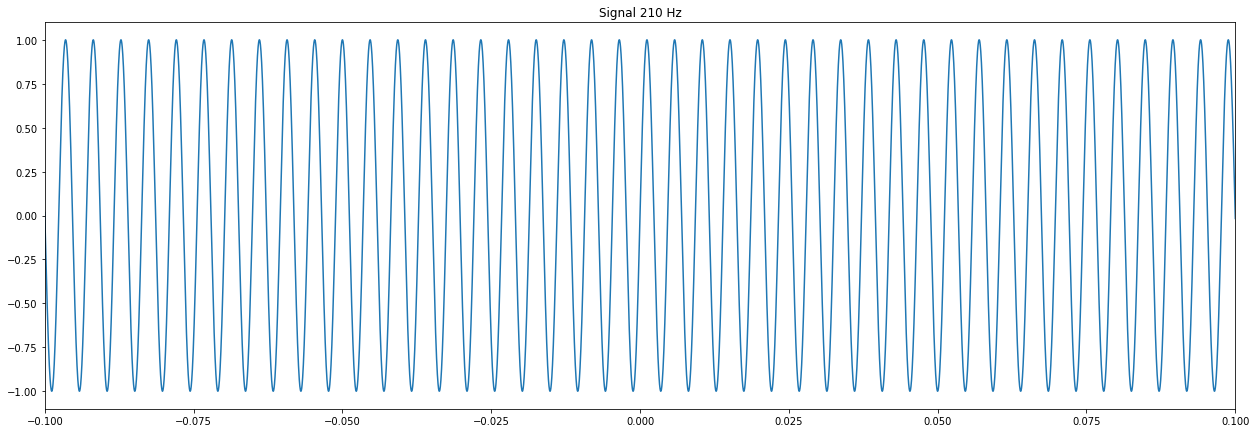

In [2]:
fs = 44100
t = np.linspace(-1, 1, 2*fs)
xo = np.sin(2*np.pi*110*t + np.pi*0.5)
xi = np.sin(2*np.pi*215*t)

audiovis(xo, time=t, tlim=[-0.1, 0.1], text='Signal 110 Hz')
audiovis(xi, time=t, tlim=[-0.1, 0.1], text='Signal 210 Hz')

audio mono


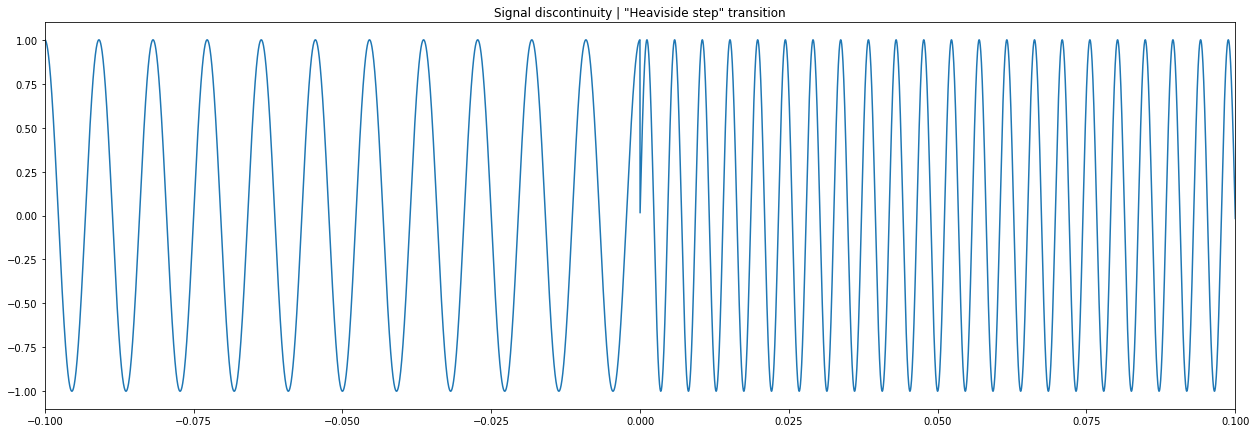

In [3]:
# heaviside step transition
b = t >= 0
x = (1 - b)*xo + b*xi
audiovis(x, time=t, tlim=[-0.1, 0.1], text='Signal discontinuity | "Heaviside step" transition')

In [4]:
Audio(x, rate=fs) # we can hear a 'tic' sound on transition

audio mono


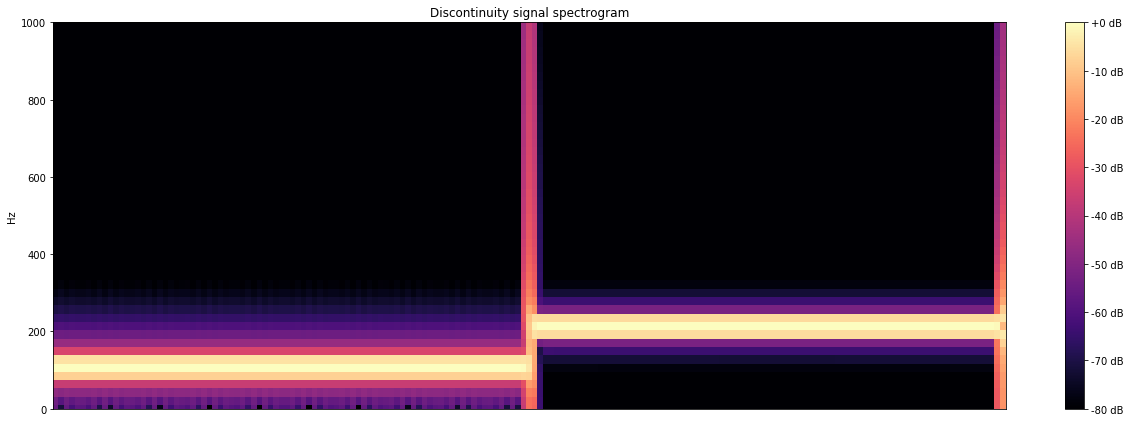

In [5]:
spectrogram(x, flim=[0, 1000], text='Discontinuity signal spectrogram')

## 1. Logistic function
---
 [Logistic function](https://en.wikipedia.org/wiki/Logistic_function) results in a sigmoidal curve, represented by equation in functions of *t*:
$$
\large f(t)=\frac{L}{1+e^{-k(t - t_0)}}
$$

where:
* $L$ : maximum sigmoid's value;
* $t_0$ : *t* value which corresponds the median point of curve;
* $k$ : curve slope.

The sigmoid curve will be used as a parameter for a linear interpolation. This process is given by:

$$
\large y=(1 - s)x_o + s x_i
$$

where *s* is the sigmoid transition and $\large x_o, x_i$ are the two signal to have the transition.

audio mono


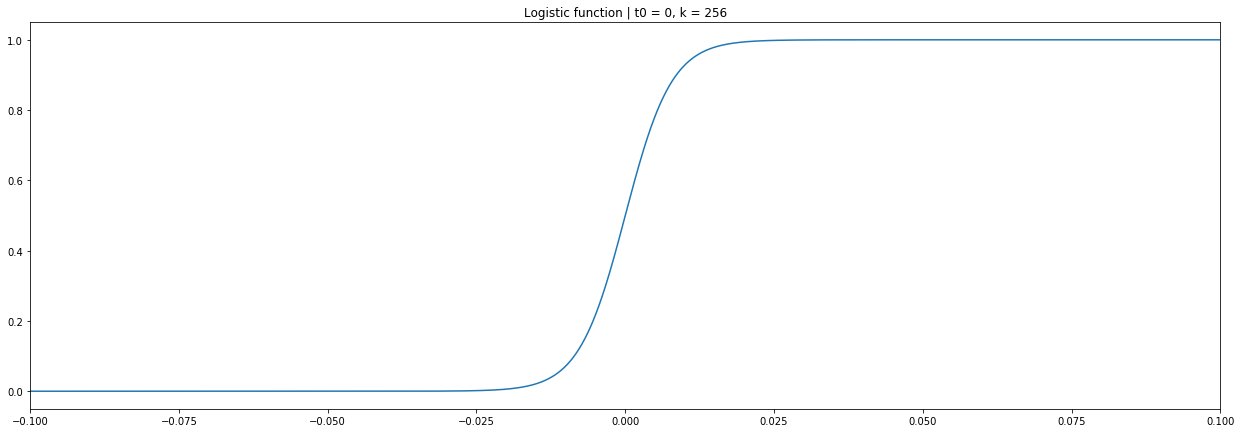

audio mono


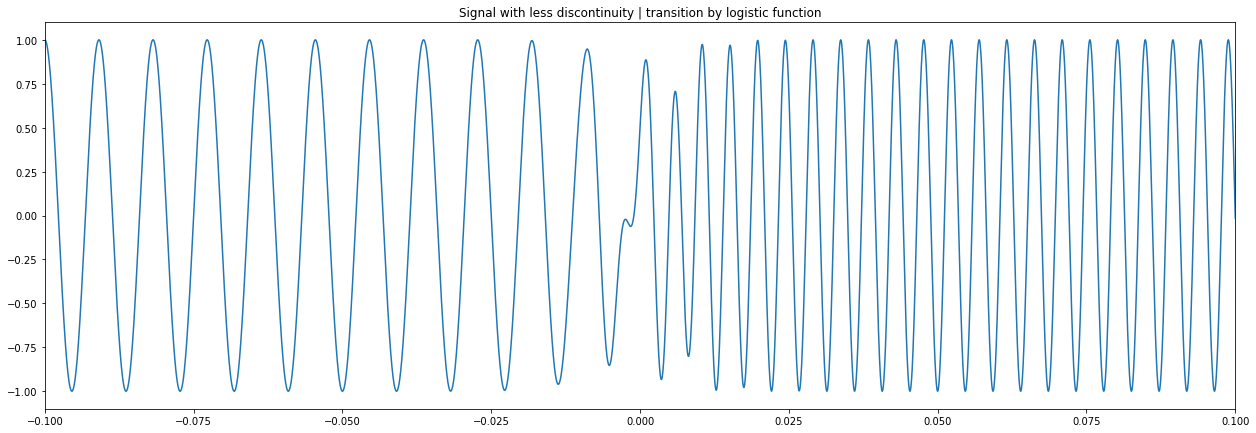

In [6]:
# logistic function transition
def logisticFunction(t, t0, k, L=1):
    return L/(1 + np.exp(-k*(t - t0)))

t0 = 0
k = 256
s = logisticFunction(t, t0, k)
x = (1 - s)*xo + s*xi
audiovis(s, time=t, tlim=[-0.1, 0.1], text='Logistic function | t0 = {0}, k = {1}'.format(t0, k))
audiovis(x, time=t, tlim=[-0.1, 0.1], text='Signal with less discontinuity | transition by logistic function')

In [7]:
Audio(x, rate=fs) # no 'tic'

audio mono


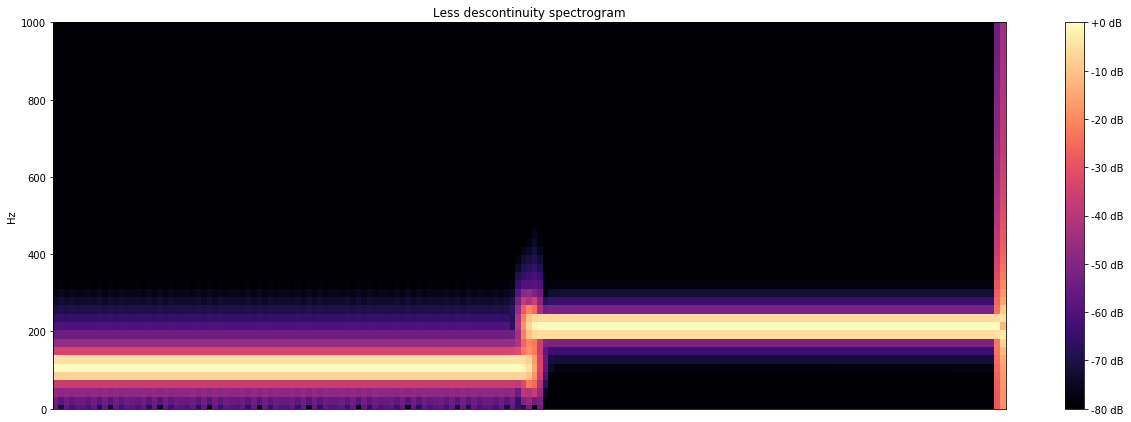

In [8]:
spectrogram(x, flim=[0, 1000], text='Less descontinuity spectrogram')